In [44]:
#This notebook needs to run in python2.7
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model

pd.set_option('precision',3)
pd.set_option('display.width',160)

In [45]:
boston=load_boston()
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
dataset['target'] = boston.target

print(dataset.describe())

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX  PTRATIO       B   LSTAT  target
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   506.00  506.00  506.00  506.00
mean     3.59   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55  408.24    18.46  356.67   12.65   22.53
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71  168.54     2.16   91.29    7.14    9.20
min      0.01    0.00    0.46    0.00    0.39    3.56    2.90    1.13    1.00  187.00    12.60    0.32    1.73    5.00
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00  279.00    17.40  375.38    6.95   17.02
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00  330.00    19.05  391.44   11.36   21.20
75%      3.65   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00  666.00    20.20  396.23   16.96   25.00
max     88.98  100.00   27.74    1.00    0.87   

In [46]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.ix[:,:-1]
y = dataset['target'].values

In [47]:
variables

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS', u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'], dtype='object')

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [49]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 08 Nov 2016   Prob (F-statistic):          6.95e-135
Time:                        09:49:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X = dataset.ix[:,:-1]
correlation_martix = X.corr()
print(correlation_martix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO     B  LSTAT
CRIM     1.00 -0.20   0.40 -0.06  0.42 -0.22  0.35 -0.38  0.62  0.58     0.29 -0.38   0.45
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39  0.18  -0.41
INDUS    0.40 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38 -0.36   0.60
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12  0.05  -0.05
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19 -0.38   0.59
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36  0.13  -0.61
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26 -0.27   0.60
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23  0.29  -0.50
RAD      0.62 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46 -0.44   0.49
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46 -0.44   0.54

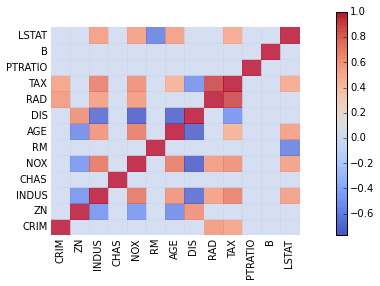

In [51]:
def visualize_correlation_matrix(data,hurdle=0.0):
    R = np.corrcoef(data,rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R,cmap=mpl.cm.coolwarm,alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables,minor=False)
    heatmap.axes.set_yticklabels(variables,minor=False)
    plt.xticks(rotation=90)
    plt.tick_params(axis='both',which='both',bottom='off',top='off',left='off',right='off')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X,hurdle=0.5)

In [52]:
corr = np.corrcoef(X,rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

print (eigenvalues)

[ 6.12265476  1.43206335  1.24116299  0.85779892  0.83456618  0.65965056
  0.53901749  0.39654415  0.06351553  0.27743495  0.16916744  0.18616388
  0.22025981]


In [53]:
print(eigenvectors[:,8])

[-0.04552843  0.08089873  0.25126664 -0.03590431 -0.04389033 -0.04580522
  0.03870705  0.01828389  0.63337285 -0.72024335 -0.02350903  0.00485021
 -0.02477196]


In [54]:
print(variables[2],variables[8],variables[9])

('INDUS', 'RAD', 'TAX')


In [59]:
#feature scaling
from sklearn.preprocessing import StandardScaler

observations = len(dataset)
variables = dataset.columns
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
originanal_stds = standardization.scale_
original_var = standardization.var_
Xst = np.column_stack((Xst,np.ones(observations)))
y = dataset['target'].values

print(original_means)
print(originanal_stds)
print(original_var)

[  3.59376071e+00   1.13636364e+01   1.11367787e+01   6.91699605e-02
   5.54695059e-01   6.28463439e+00   6.85749012e+01   3.79504269e+00
   9.54940711e+00   4.08237154e+02   1.84555336e+01   3.56674032e+02
   1.26530632e+01]
[  8.58828355e+00   2.32993957e+01   6.85357058e+00   2.53742935e-01
   1.15763115e-01   7.01922514e-01   2.81210326e+01   2.10362836e+00
   8.69865112e+00   1.68370495e+02   2.16280519e+00   9.12046075e+01
   7.13400164e+00]
[  7.37586143e+01   5.42861840e+02   4.69714297e+01   6.43854770e-02
   1.34010989e-02   4.92695216e-01   7.90792473e+02   4.42525226e+00
   7.56665313e+01   2.83486236e+04   4.67772630e+00   8.31828042e+03
   5.08939794e+01]


In [56]:
print(X.head())
print(Xst)

   CRIM  ZN  INDUS  CHAS   NOX    RM   AGE   DIS  RAD  TAX  PTRATIO       B  LSTAT
0  0.01  18   2.31     0  0.54  6.58  65.2  4.09    1  296     15.3  396.90   4.98
1  0.03   0   7.07     0  0.47  6.42  78.9  4.97    2  242     17.8  396.90   9.14
2  0.03   0   7.07     0  0.47  7.18  61.1  4.97    2  242     17.8  392.83   4.03
3  0.03   0   2.18     0  0.46  7.00  45.8  6.06    3  222     18.7  394.63   2.94
4  0.07   0   2.18     0  0.46  7.15  54.2  6.06    3  222     18.7  396.90   5.33
[[-0.41771335  0.28482986 -1.2879095  ...,  0.44105193 -1.0755623   1.        ]
 [-0.41526932 -0.48772236 -0.59338101 ...,  0.44105193 -0.49243937  1.        ]
 [-0.41527165 -0.48772236 -0.59338101 ...,  0.39642699 -1.2087274   1.        ]
 ..., 
 [-0.41137448 -0.48772236  0.11573841 ...,  0.44105193 -0.98304761  1.        ]
 [-0.40568883 -0.48772236  0.11573841 ...,  0.4032249  -0.86530163  1.        ]
 [-0.41292893 -0.48772236  0.11573841 ...,  0.44105193 -0.66905833  1.        ]]
